## Import Library

In [6]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [7]:
df = pd.read_csv('Downloads/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### tidak ada data yg duplikat

In [8]:
df.duplicated().sum()

0

### Lakukan One Hot Encoder Pada dataset

In [9]:

encoder = OneHotEncoder(sparse_output=False)

categories = ["suicides_no", "sex"]
df_categorical = encoder.fit_transform(df[categories])
categorical = encoder.get_feature_names_out(categories)
df_categorical = pd.DataFrame(df_categorical, columns=categorical)

df_categorical.head()

,suicides_no_0,suicides_no_1,suicides_no_2,suicides_no_3,suicides_no_4,suicides_no_5,suicides_no_6,suicides_no_7,suicides_no_8,suicides_no_9,...,suicides_no_20119,suicides_no_20256,suicides_no_20562,suicides_no_20705,suicides_no_21063,suicides_no_21262,suicides_no_21706,suicides_no_22338,sex_female,sex_male
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Menggabungkan kolom yang telah di encoder dengan data set

In [10]:
df = pd.concat([df, df_categorical], axis=1)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),...,suicides_no_20119,suicides_no_20256,suicides_no_20562,suicides_no_20705,suicides_no_21063,suicides_no_21262,suicides_no_21706,suicides_no_22338,sex_female,sex_male
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Split data set menjadi train dan set

In [11]:
X = df['suicides_no_7'] 
y = df['sex_female']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Penerapan sequential model pada dataset

In [13]:

model = Sequential([
    layers.Dense(128, activation='relu', input_shape=[1]),
    layers.Dense(50, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### Model dilatih dengan model split

In [14]:
hist=model.fit(X_train,y_train, epochs=100 ,validation_split =0.2,batch_size=32)

Epoch 1/100
557/557 [==============================] - 4s 5ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.4966
Epoch 2/100
557/557 [==============================] - 2s 4ms/step - loss: 0.6930 - accuracy: 0.5057 - val_loss: 0.6926 - val_accuracy: 0.5083
Epoch 3/100
557/557 [==============================] - 3s 5ms/step - loss: 0.6930 - accuracy: 0.5061 - val_loss: 0.6927 - val_accuracy: 0.5083
Epoch 4/100
557/557 [==============================] - 3s 5ms/step - loss: 0.6930 - accuracy: 0.5061 - val_loss: 0.6925 - val_accuracy: 0.5083
Epoch 5/100
557/557 [==============================] - 3s 5ms/step - loss: 0.6930 - accuracy: 0.5041 - val_loss: 0.6924 - val_accuracy: 0.5083
Epoch 6/100
557/557 [==============================] - 3s 5ms/step - loss: 0.6930 - accuracy: 0.5061 - val_loss: 0.6926 - val_accuracy: 0.5083
Epoch 7/100
557/557 [==============================] - 3s 6ms/step - loss: 0.6929 - accuracy: 0.5040 - val_loss: 0.6926 - val_accuracy: 0.5083

In [15]:

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=-1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Akurasi:", accuracy)

174/174 [==============================] - 1s 2ms/step
Akurasi: 0.48634076204169663


### Evaluasi Model Terhadap Hasil

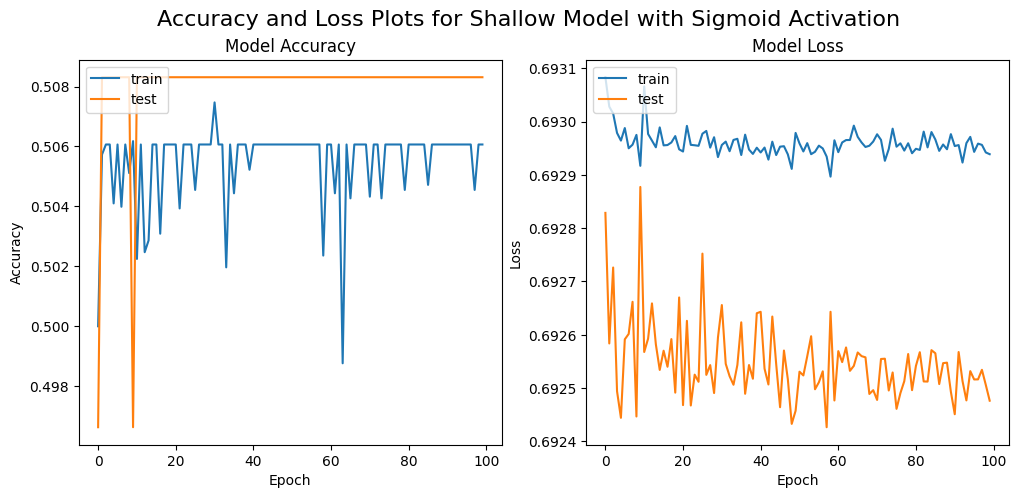

In [18]:
import matplotlib.pyplot as plt
def plot_acc_loss(history, model_name):
    # Plot the accuracy and loss graphs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')

    fig.suptitle(f"Accuracy and Loss Plots for {model_name}", fontsize=16)
    plt.show()

plot_acc_loss(hist, "Shallow Model with Sigmoid Activation")